## Import all necessary packages

In [1]:
import numpy as np
import pandas as pd
import os
import xarray as xr
import matplotlib.pyplot as plt
import importlib
import yaml
import glob
import sys
#sys.path.append(os.path.abspath('').split('notebooks')[0])
from WBTSdata import plotters, tools, merge_datasets, config


/home/runner/work/WBTSdata/WBTSdata/WBTSdata/load_vel_files.py:31: SyntaxWarning: invalid escape sequence '\s'
  vel_list.append(pd.read_csv(os.path.join(vel_dir, vel_file),names=column_names, skiprows=74, sep='\s+', encoding='utf-8'))
/home/runner/work/WBTSdata/WBTSdata/WBTSdata/load_cal_files.py:34: SyntaxWarning: invalid escape sequence '\s'
  cal_list.append(pd.read_csv(os.path.join(cal_dir, cal_file), names=column_names, skiprows=12, sep='\s+'))


Note: This assumes you have already installed the package using
``` 
pip install -e .
```

## Demo Configuration

This demo notebook processes only the first 3 years of data (2001-2003) for demonstration purposes. This prevents memory issues when loading all 27 years of data simultaneously.

For processing the full dataset, use:
```python
ds_all = merge_datasets.merge_years(output_dir)  # Process all files
```

## Load the merged file

Loads the file created by running the script `load_data.ipynb`

In [2]:
### import basepath from mission_config.yaml
config = tools.get_config()
input_dir = config['input_dir']
output_dir = config['output_dir']
print('Input directory: ',input_dir ,'\nOutput directory: ',output_dir)


Input directory:  ../data/input 
Output directory:  ../data


In [3]:
ds_all = merge_datasets.merge_years(output_dir, max_files=3)

/home/runner/work/WBTSdata/WBTSdata/WBTSdata/merge_datasets.py:235: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'DEPTH' ('DEPTH',) The recommendation is to set join explicitly for this case.
  concatenated_ds = xr.concat(processed_datasets, dim='DATETIME')


Processing 3 files for demonstration (limited from 3 total)
Loading WBTS_2001_04_CTD_LADCP.nc...
Loading WBTS_2002_06_CTD_LADCP.nc...
Loading WBTS_2003_02_CTD_LADCP.nc...


In [4]:
ds_all

<xarray.Dataset> Size: 60MB
Dimensions:           (DATETIME: 148, DEPTH: 5595)
Coordinates:
  * DEPTH             (DEPTH) float64 45kB 1.0 2.0 3.0 ... 5.594e+03 5.595e+03
  * DATETIME          (DATETIME) datetime64[ns] 1kB 2001-04-26T17:06:58 ... 2...
    LATITUDE          (DATETIME) float64 1kB 26.45 27.02 26.43 ... 26.99 26.99
    LONGITUDE         (DATETIME) float64 1kB -79.92 -79.92 ... -79.28 -79.2
Data variables:
    TEMP              (DATETIME, DEPTH) float64 7MB 26.02 26.02 ... nan nan
    THETA             (DATETIME, DEPTH) float64 7MB 26.02 26.02 ... nan nan
    PSAL              (DATETIME, DEPTH) float64 7MB 36.23 36.23 ... nan nan
    DYN_HEIGHT        (DATETIME, DEPTH) float64 7MB 0.004 0.008 ... nan nan
    GA                (DATETIME, DEPTH) float64 7MB 0.993 1.987 2.98 ... nan nan
    DOXY              (DATETIME, DEPTH) float64 7MB 214.4 214.5 ... nan nan
    TIME_FLAG         (DATETIME) float64 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    CAST_NUMBER       (DATETIME) float64 1kB 0.0 1.0 2.0 3.0 ... 52.0 53.0 54.0
    GC_STRING         (DATETIME) <U10 6kB 'GC_2001_04' ... 'GC_2003_02'
    U_WATER_VELOCITY  (DATETIME, DEPTH) float64 7MB nan nan nan ... nan nan nan
    V_WATER_VELOCITY  (DATETIME, DEPTH) float64 7MB nan nan nan ... nan nan nan
    ERROR_VELOCITY    (DATETIME, DEPTH) float64 7MB nan nan nan ... nan nan nan
Attributes: (12/26)
    title:                      CTD and LADCP data of the Abaco Cruise
    project:                    Western Boundary Time Series
    project_id:                 AB0104 / OC365-9
    platform:                   CTD and Lowered Acoustic Doppler Current Prof...
    geospatial_lat_min:         26.033
    geospatial_lat_max:         27.421
    ...                         ...
    data_url:                   
    web_link:                   https://www.aoml.noaa.gov/phod/wbts/data.php
    comment:                    GIT repository: https://github.com/ifmeo-hamb...
    date_created:               2024-12-06
    featureType:                profile
    Conventions:                CF-1.11

In [5]:
ds_all.to_netcdf(output_dir+'/Merged/'+'WBTS_all_years_CTD_LADCP.nc')

## Plot the stations of the whole time series for different longitudes

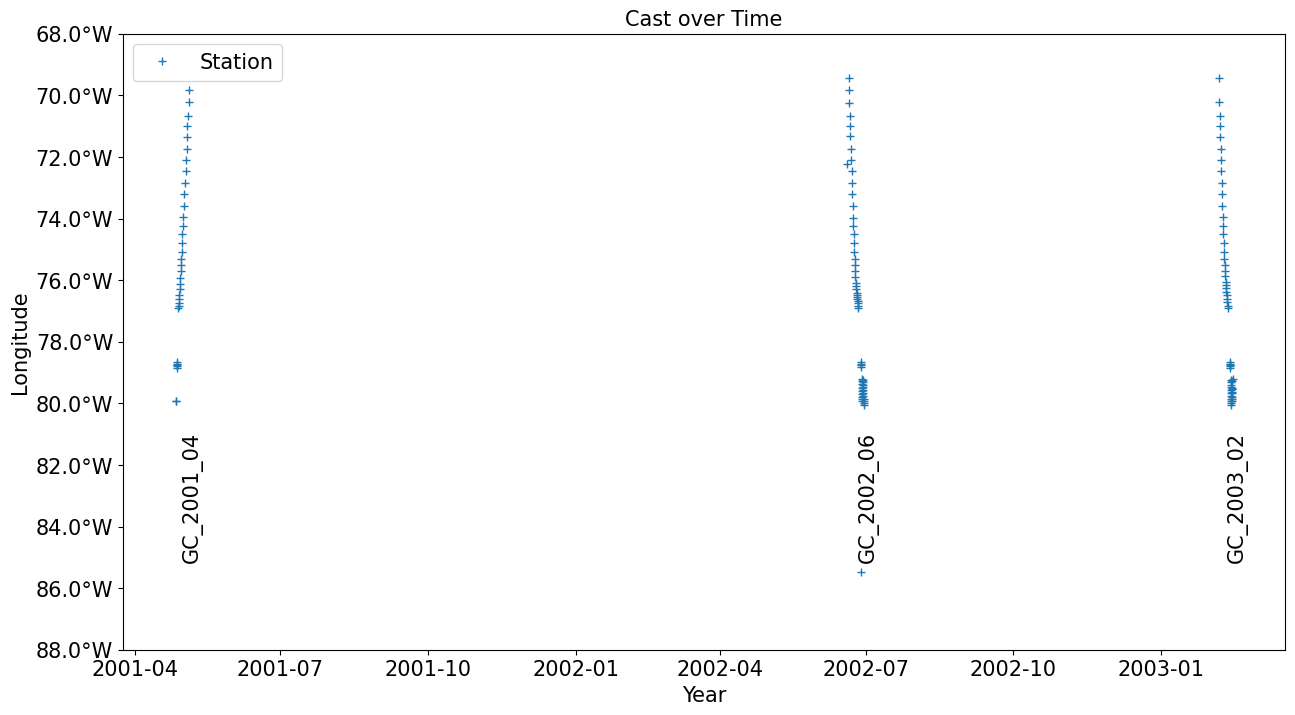

In [6]:
# Example usage
fig, ax = plotters.plot_cast_over_time(ds_all)
plt.show()